In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

file_path = "StudentsPerformance.csv"


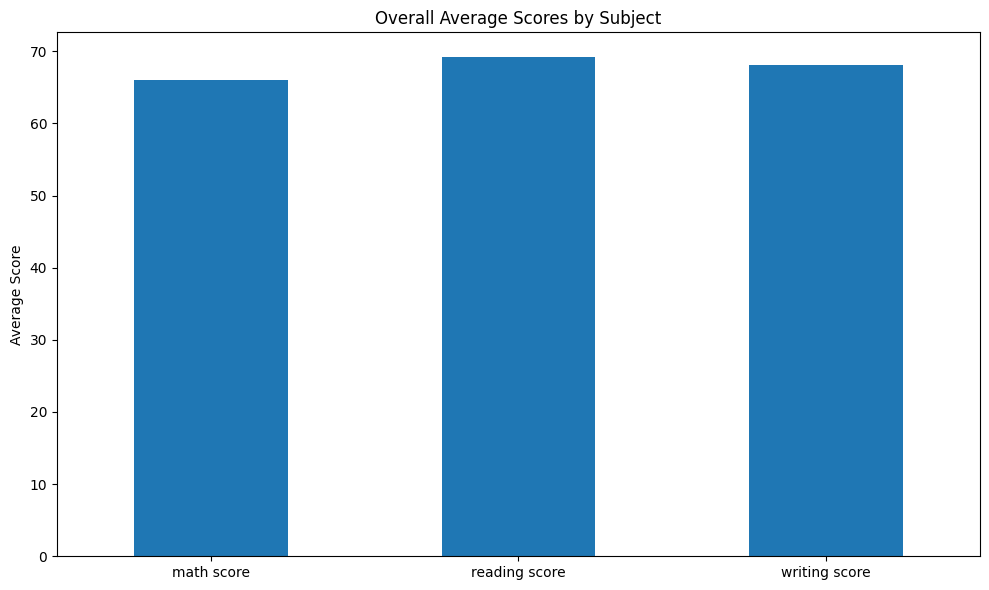

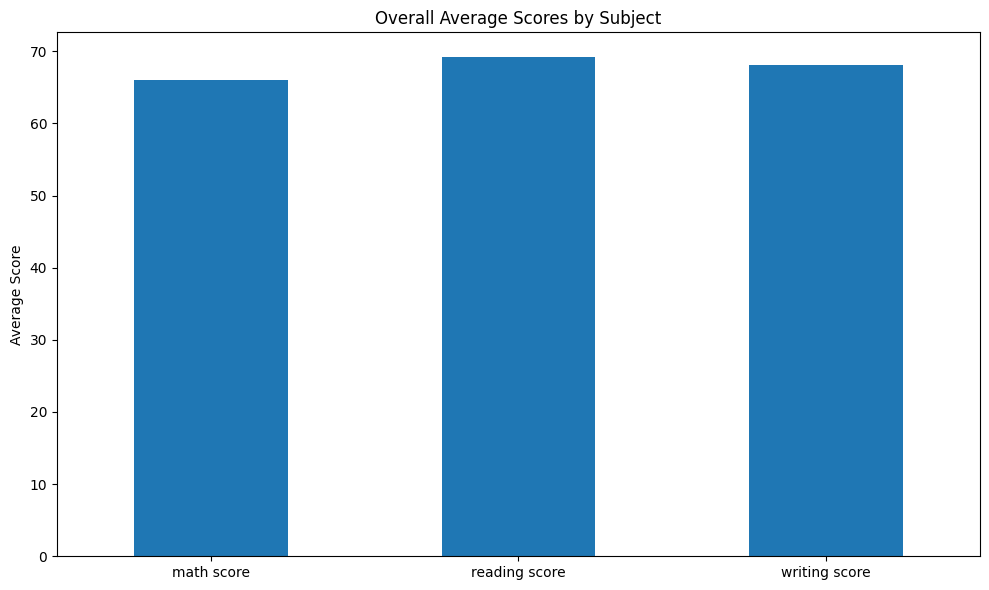

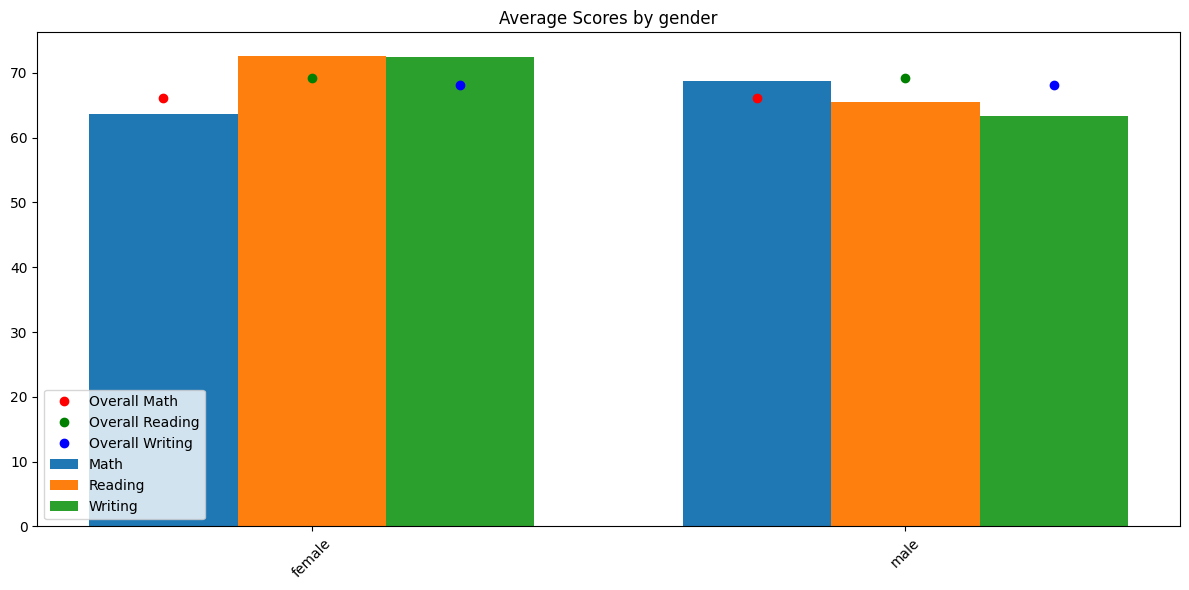

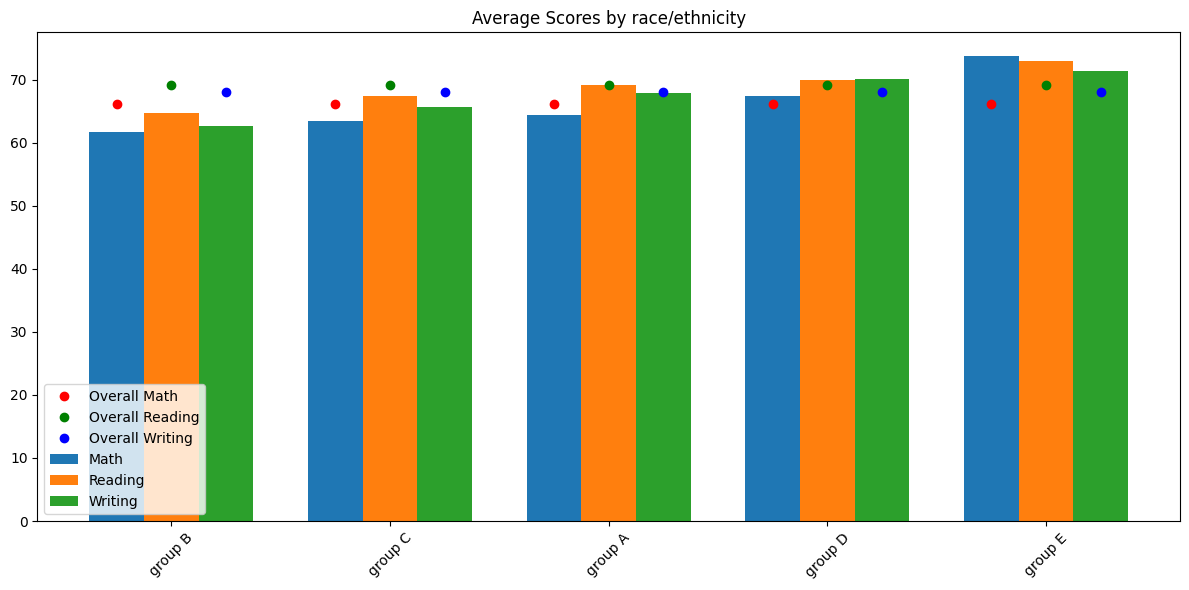

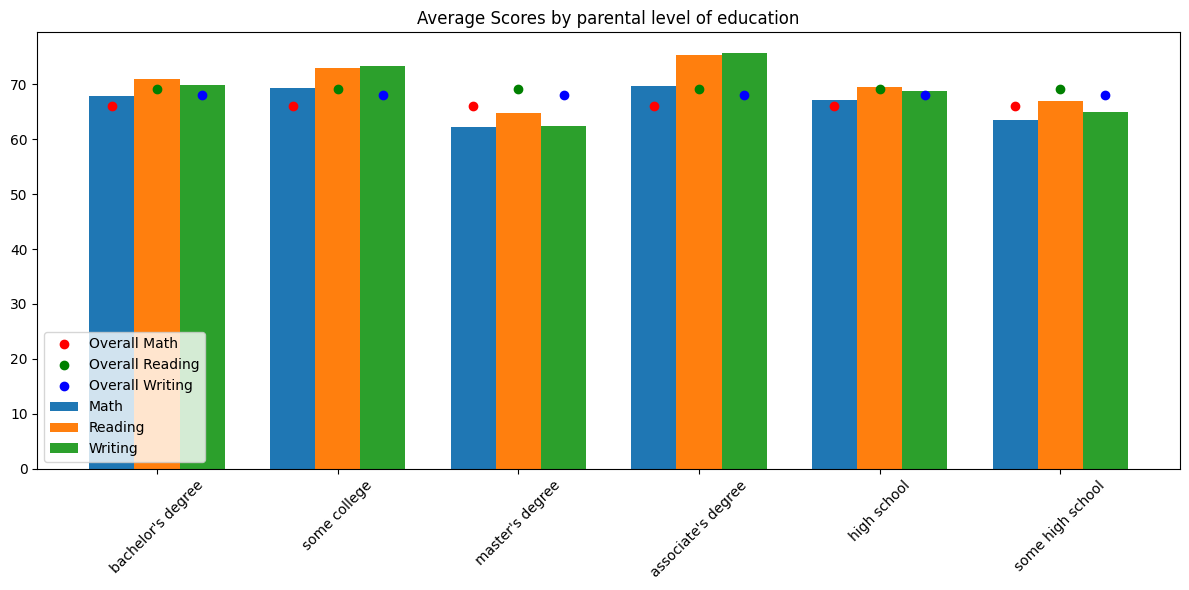

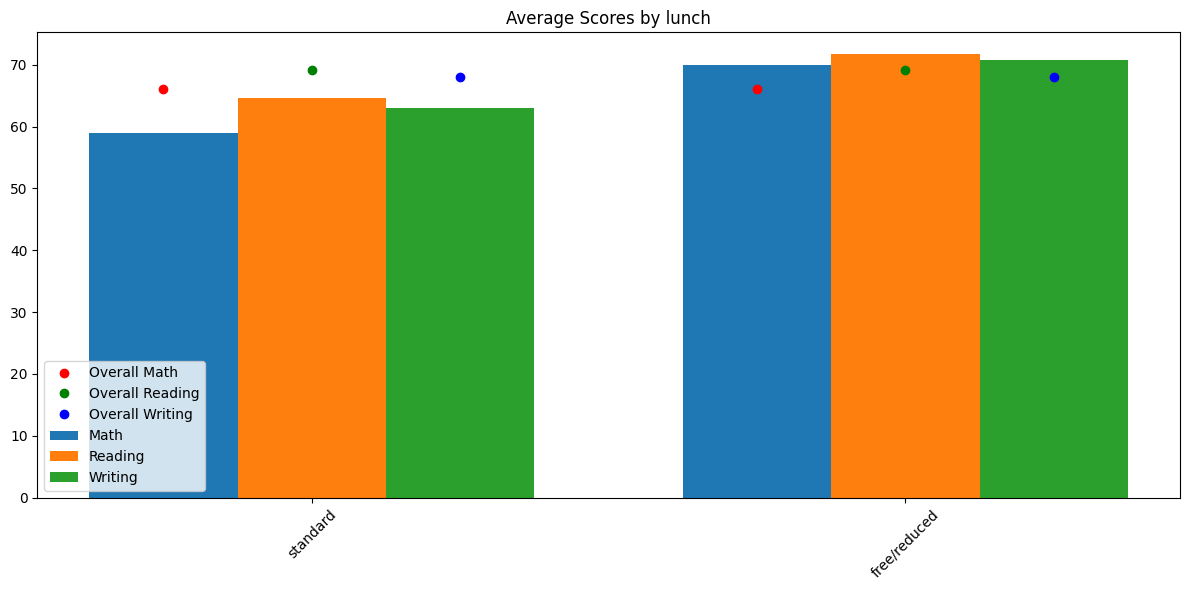

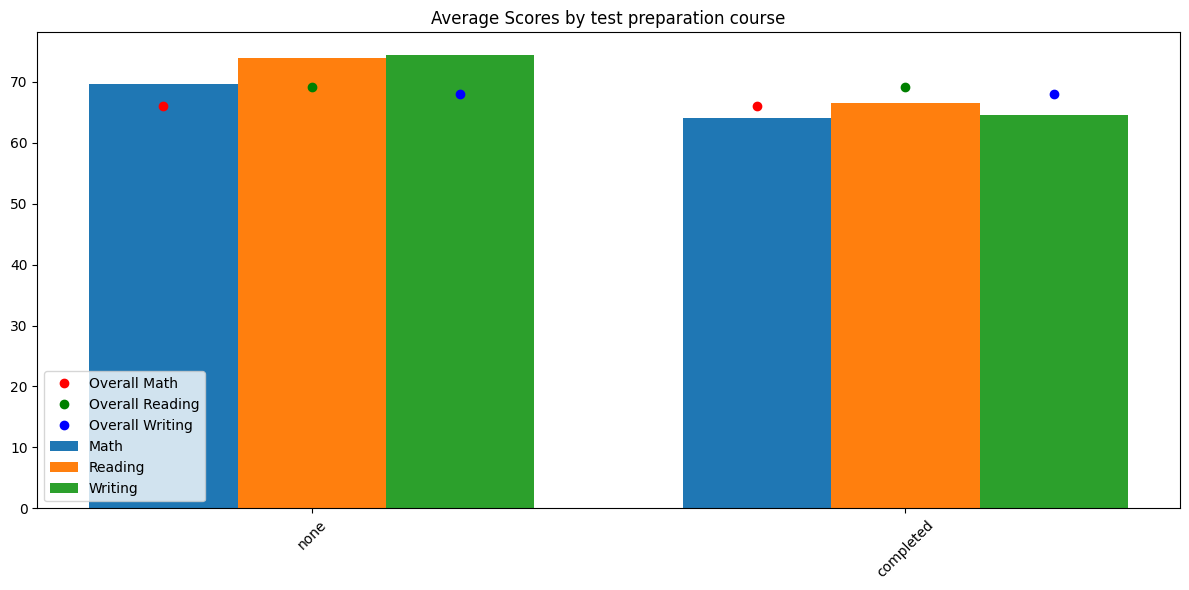

In [ ]:
df = pd.read_csv(file_path)

# Calculate overall average scores
score_columns = ['math score', 'reading score', 'writing score']
overall_avg = df[score_columns].mean()

# Create bar plot for overall averages
plt.figure(figsize=(10, 6))
overall_avg.plot(kind='bar')
plt.title('Overall Average Scores by Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()

# Create visualizations for each categorical column
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
plot_images = {}

plt.figure(figsize=(10, 6))
overall_avg.plot(kind='bar')
plt.title('Overall Average Scores by Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
plot_images['overall_averages'] = base64.b64encode(buffer.getvalue()).decode('utf-8')
plt.show()
plt.close()

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Calculate means for each score by category
    math_means = df.groupby(col)['math score'].mean()
    reading_means = df.groupby(col)['reading score'].mean()
    writing_means = df.groupby(col)['writing score'].mean()
    
    # Set bar positions
    x = range(len(df[col].unique()))
    width = 0.25
    
    # Create bars
    plt.bar([i - width for i in x], math_means, width, label='Math')
    plt.bar(x, reading_means, width, label='Reading')
    plt.bar([i + width for i in x], writing_means, width, label='Writing')
    
    # Add overall average points
    plt.plot([i - width for i in x], [overall_avg['math score']] * len(x), 'ro', label='Overall Math')
    plt.plot(x, [overall_avg['reading score']] * len(x), 'go', label='Overall Reading')
    plt.plot([i + width for i in x], [overall_avg['writing score']] * len(x), 'bo', label='Overall Writing')
    plt.title(f'Average Scores by {col}')
    plt.xticks(x, df[col].unique(), rotation=45)
    plt.legend()
    plt.tight_layout()
    plot_images[col] = base64.b64encode(buffer.getvalue()).decode('utf-8')
    plt.show()
    plt.close()


In [23]:
print(plot_images.keys())

dict_keys(['overall_averages', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
